#                                   **Efficient Data Stream Anomaly Detection**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
import time

imported all the required libraries

In [7]:
def generate_data_stream(size=1000):
    # Generated a sequence of time points from 0 to size-1
    time_points = np.arange(size)

    # Created a regular pattern by applying a sine function with a frequency of 0.05 and amplitude of 10
    regular_pattern = np.sin(time_points * 0.05) * 10

    # Add a seasonal element using a sine function with a higher frequency (0.2) and lower amplitude (5)
    seasonal_element = np.sin(time_points * 0.2) * 5

    # Introduced a random noise with a normal distribution (mean=0, standard deviation=2)
    random_noise = np.random.normal(0, 2, size)

    # Combining  the regular pattern, seasonal element, and random noise to form the data stream
    data_stream = regular_pattern + seasonal_element + random_noise

    # Return the generated data stream
    return data_stream


In [8]:
def detect_anomalies(data_stream, model, contamination=0.01):
    # Fit the Isolation Forest model to the reshaped data stream
    model.fit(data_stream.reshape(-1, 1))

    # Predict anomalies using the trained model on the reshaped data stream
    anomalies = model.predict(data_stream.reshape(-1, 1))

    # Return the detected anomalies
    return anomalies


Visualising the plots

In [9]:
def visualize_data_stream(data_stream, anomalies):
    # Plot the entire data stream in blue
    plt.plot(data_stream, label='Data Stream', color='blue')

    # Highlight detected anomalies in red using scatter plot
    plt.scatter(np.where(anomalies == -1), data_stream[anomalies == -1], color='red', label='Anomalies')

    # Set plot title and axis labels
    plt.title('Data Stream with Anomalies')
    plt.xlabel('Time')
    plt.ylabel('Value')

    # Displaying the legend indicating the blue line as data stream and red points as anomalies
    plt.legend()
    # plotting
    plt.show()

In [10]:
def main():
    # Set the size of the data stream to 100 to understand quickly
    stream_size = 100

    # Generate a data stream of size 'stream_size'
    data_stream = generate_data_stream(stream_size)

    # Set the contamination rate for Isolation Forest
    contamination_rate = 0.01

    # Create an Isolation Forest model with the specified contamination rate
    model = IsolationForest(contamination=contamination_rate)

    # Iterate over the data stream in batches of 20 data points
    for i in range(1, stream_size + 1, 20):
        # Extract the current batch of data points
        current_data_points = data_stream[:i]

        # Detect anomalies using the Isolation Forest model
        anomalies = detect_anomalies(current_data_points, model, contamination=contamination_rate)

        # Visualize the current batch of data stream and detected anomalies
        visualize_data_stream(current_data_points, anomalies)

    # Display the final plot showing the entire data stream and detected anomalies
    plt.show()


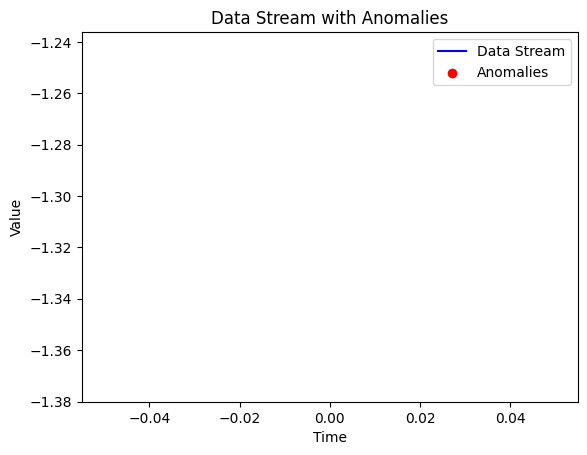

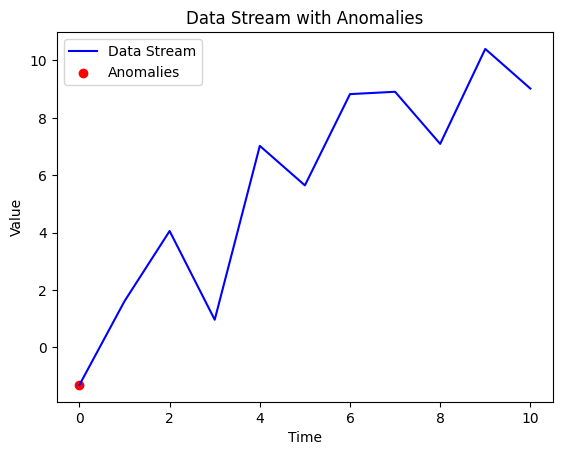

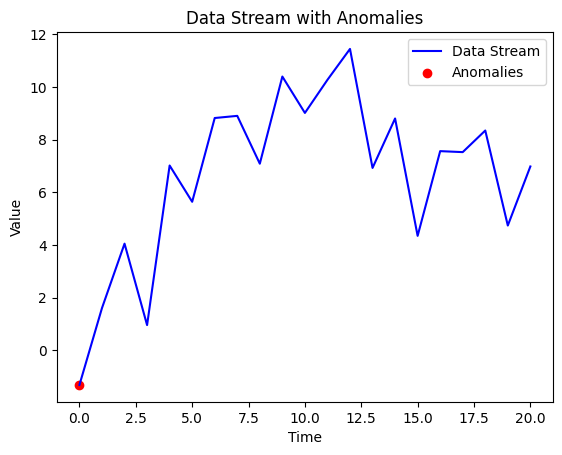

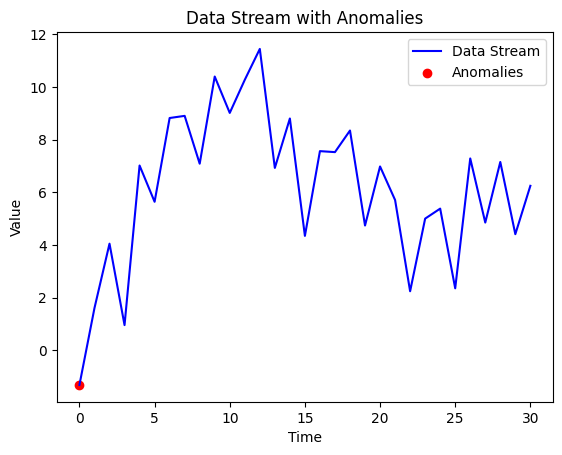

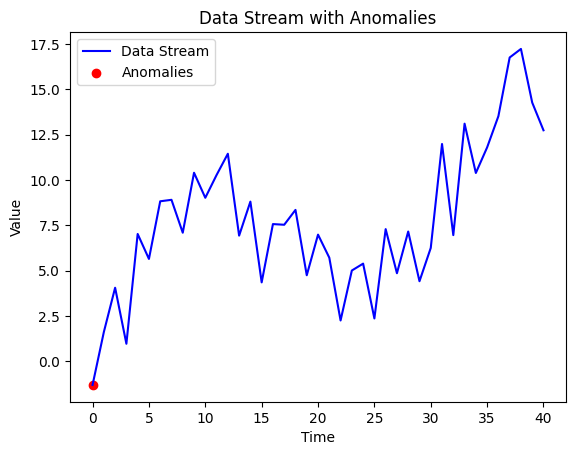

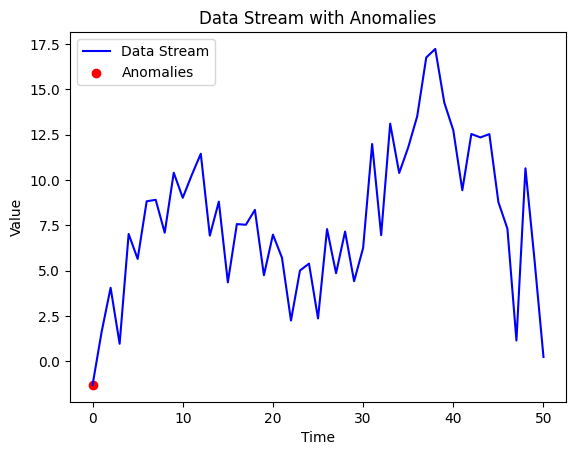

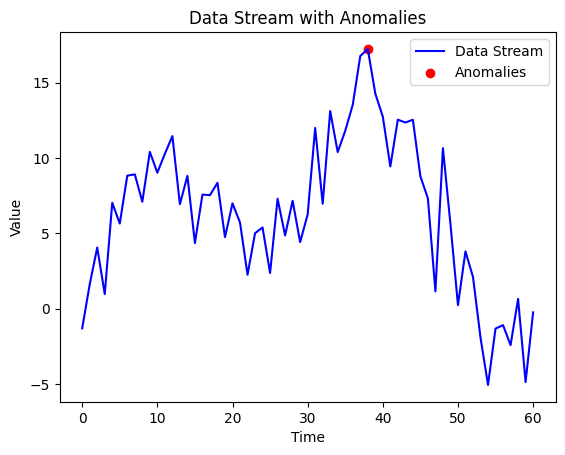

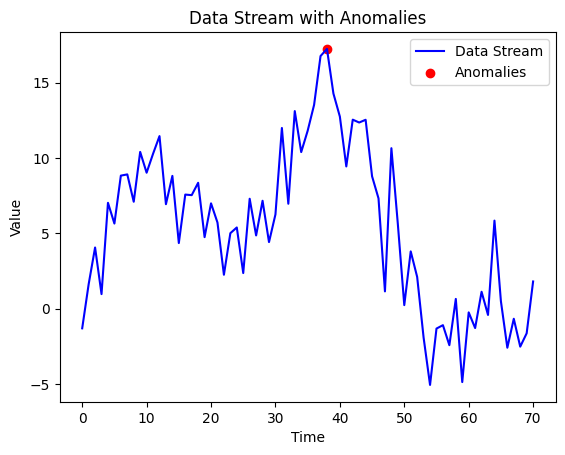

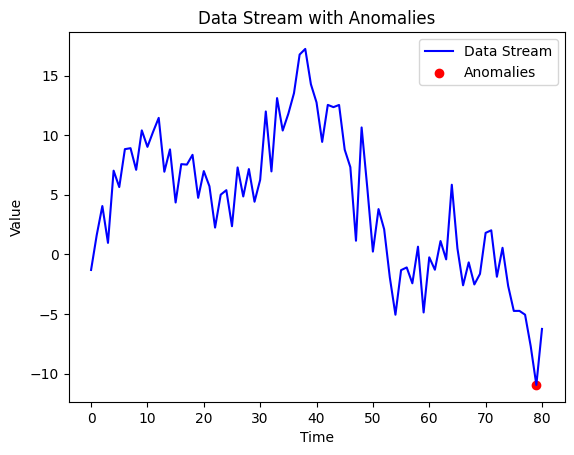

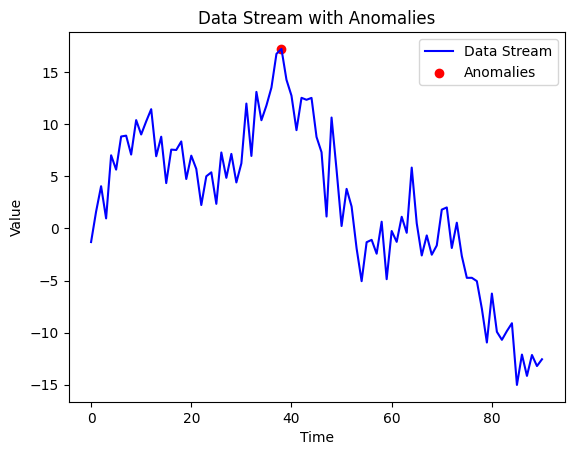

In [6]:
if __name__ == "__main__":
    main()